## CNN Assignment
Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


### Importing all the important libraries

In [ ]:
## Importing required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pathlib
import os
import PIL
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Rescaling, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
## Mounting Goodle Drive to pull the Raw Data
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/CNN_assignment/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/CNN_assignment/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Creating Train data set
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    color_mode='rgb',
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Creating validation dataset here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    color_mode='rgb',
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print('The different class are:')
print(class_names)

The different class are:
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

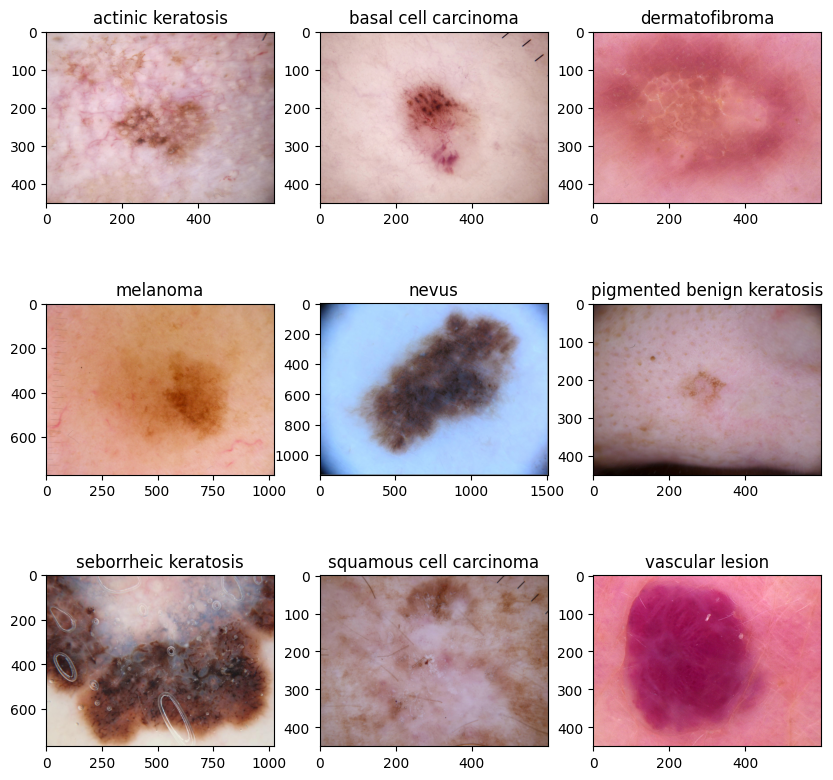

In [ ]:
## isualize one instance of all the nine classes present in the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
## Creating the model
model=Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(Rescaling(scale=1./255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(len(class_names),activation='softmax'))


### Compile the model

In [ ]:
### Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 174, 174, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 968832)            0         
                                                        

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 103s 2s/step - loss: 2.8714 - accuracy: 0.2617 - val_loss: 1.7332 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 11s 203ms/step - loss: 1.6159 - accuracy: 0.4291 - val_loss: 1.5689 - val_accuracy: 0.4855
Epoch 3/20
56/56 [==============================] - 12s 216ms/step - loss: 1.4225 - accuracy: 0.4978 - val_loss: 1.5536 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 12s 205ms/step - loss: 1.3146 - accuracy: 0.5485 - val_loss: 1.5640 - val_accuracy: 0.4452
Epoch 5/20
56/56 [==============================] - 12s 206ms/step - loss: 1.1378 - accuracy: 0.6021 - val_loss: 1.6440 - val_accuracy: 0.4899
Epoch 6/20
56/56 [==============================] - 12s 208ms/step - loss: 1.0280 - accuracy: 0.6551 - val_loss: 1.8511 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 12s 209ms/step - loss: 0.8828 - accuracy: 0.6998 - val_loss: 1.8232 - val_accuracy: 0.4832
E

### Visualizing training results

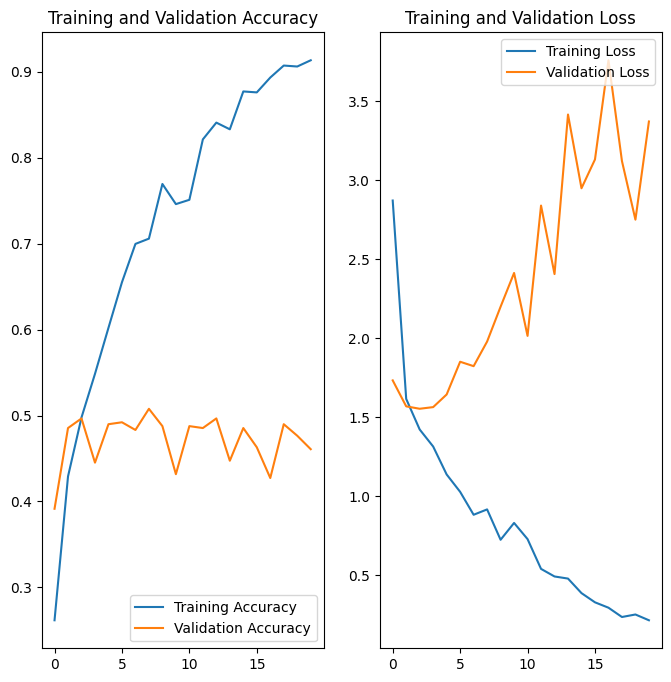

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:
1. The model is overfitting because we can also see difference in loss functions in training & test
2. Model train accuracy is close to 90% where are validation accuracy is close to 50% (which is not good)
3. VAlidation loss is increasing

In [ ]:
#  Choosing augmentation strategy
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(0.2)
])

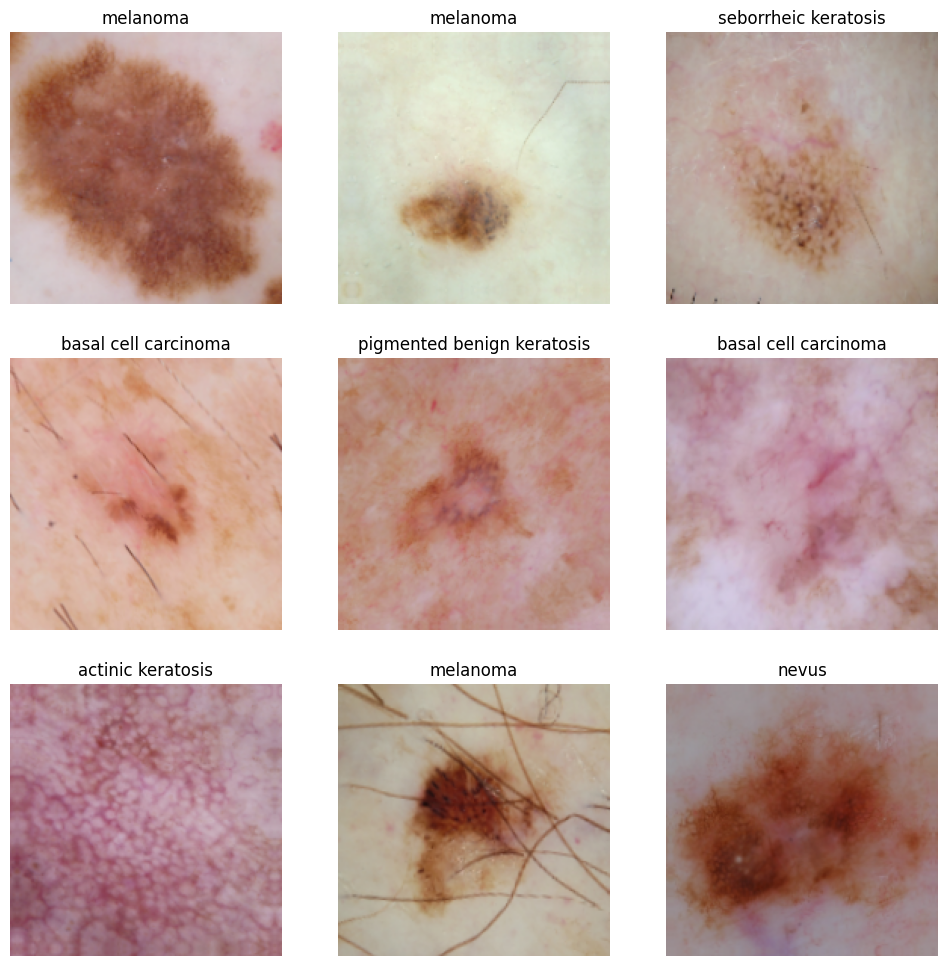

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Create Model with augmented data


In [ ]:
model=Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(Rescaling(scale=1./255,input_shape=(img_height,img_width,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augument)

model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(layers.Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(len(class_names),activation='softmax'))



### Compiling the model

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
## Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 174, 174, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 128)      0         
 2D)                                                             
                                                      

### Training the model

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 279ms/step - loss: 6.2853 - accuracy: 0.2260 - val_loss: 1.8063 - val_accuracy: 0.3289
Epoch 2/20
56/56 [==============================] - 15s 275ms/step - loss: 1.8460 - accuracy: 0.3259 - val_loss: 1.8216 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 15s 274ms/step - loss: 1.8104 - accuracy: 0.3583 - val_loss: 1.6079 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 16s 282ms/step - loss: 1.6403 - accuracy: 0.4392 - val_loss: 1.5314 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 15s 276ms/step - loss: 1.5179 - accuracy: 0.4587 - val_loss: 1.4623 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 15s 277ms/step - loss: 1.4841 - accuracy: 0.4866 - val_loss: 1.5048 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 16s 289ms/step - loss: 1.5091 - accuracy: 0.4743 - val_loss: 1.4377 - val_accuracy: 0.5235

### Visualizing the results

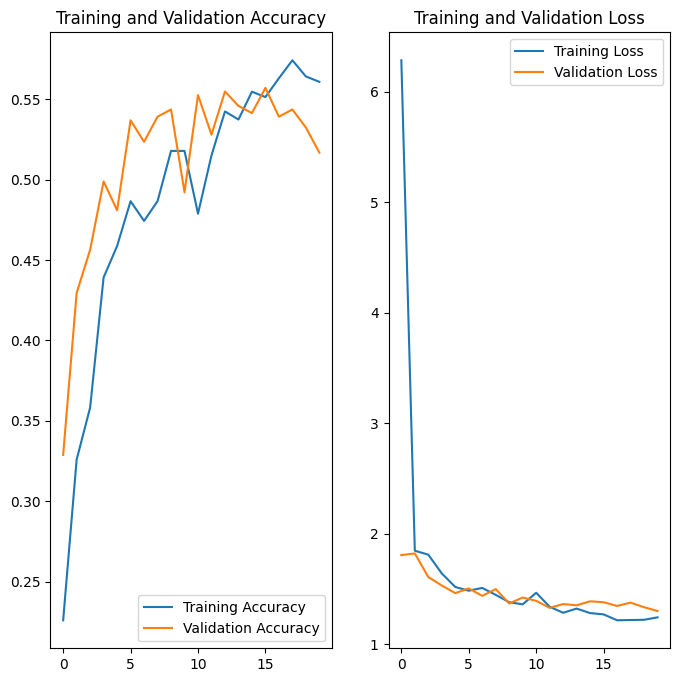

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:
1. Training accuracy and validation accuracy are almost same however there is a significant drop in training accuracy.
2. The overfitting is also reduced.

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

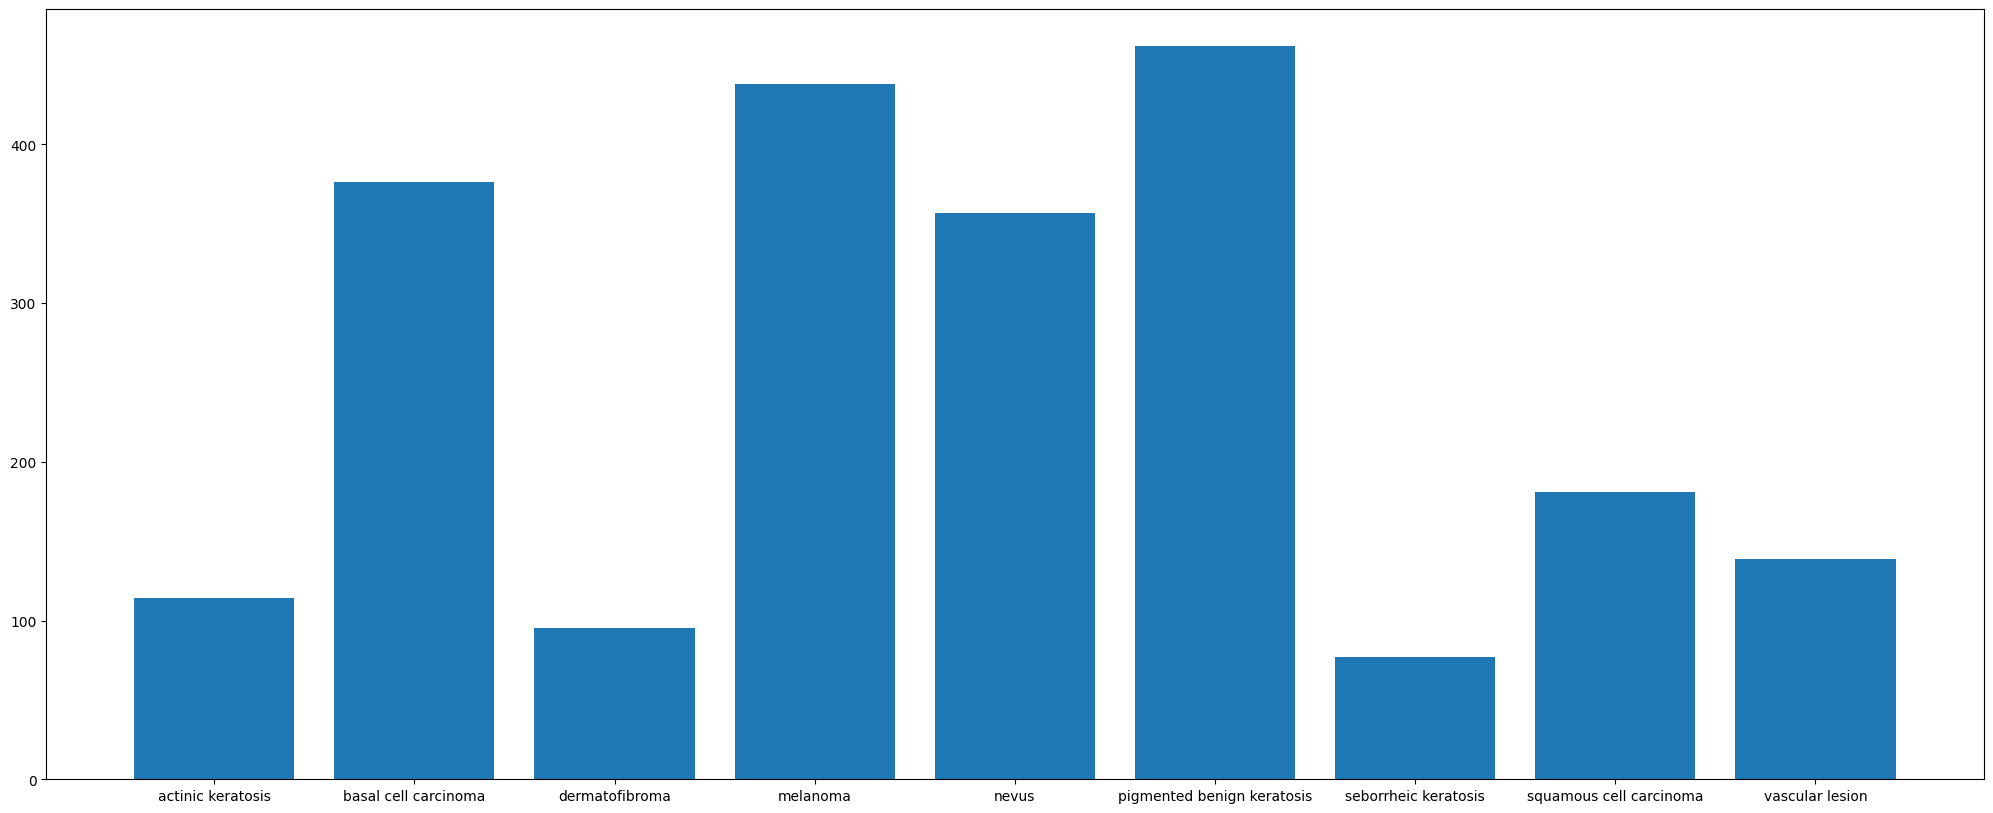

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [ ]:
## Printing the number of samples of each class
for i in range(len(class_names)):
  print(class_names[i],' : ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  :  114
basal cell carcinoma  :  376
dermatofibroma  :  95
melanoma  :  438
nevus  :  357
pigmented benign keratosis  :  462
seborrheic keratosis  :  77
squamous cell carcinoma  :  181
vascular lesion  :  139


#### Observations:
#### - Which class has the least number of samples? -- seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples? -- pigmented benign keratosis
#### - Class imbalance is clearly visible


## Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="gdrive/My Drive/CNN_assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2F7AB0FF10>: 100%|██████████| 500/500 [00:16<00:00, 30.21 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D2F7AB4B0D0>: 100%|██████████| 500/500 [00:17<00:00, 29.14 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2F7ADE84C0>: 100%|██████████| 500/500 [00:19<00:00, 25.37 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D2FA4BEEBF0>: 100%|██████████| 500/500 [01:23<00:00,  5.98 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7D30082392D0>: 100%|██████████| 500/500 [01:22<00:00,  6.10 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2F9E11F100>: 100%|██████████| 500/500 [00:17<00:00, 28.77 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D2FF08E0310>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D300C22DAB0>: 100%|██████████| 500/500 [00:16<00:00, 29.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2FF07F9F60>: 100%|██████████| 500/500 [00:19<00:00, 26.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
## Printing the number of samples of each class after augmentation
for i in range(len(class_names)):
  print(class_names[i],' : ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))) + len(list(data_dir_train.glob(class_names[i]+'/output/*.jpg'))))

actinic keratosis  :  614
basal cell carcinoma  :  876
dermatofibroma  :  595
melanoma  :  938
nevus  :  857
pigmented benign keratosis  :  962
seborrheic keratosis  :  577
squamous cell carcinoma  :  681
vascular lesion  :  639


<BarContainer object of 9 artists>

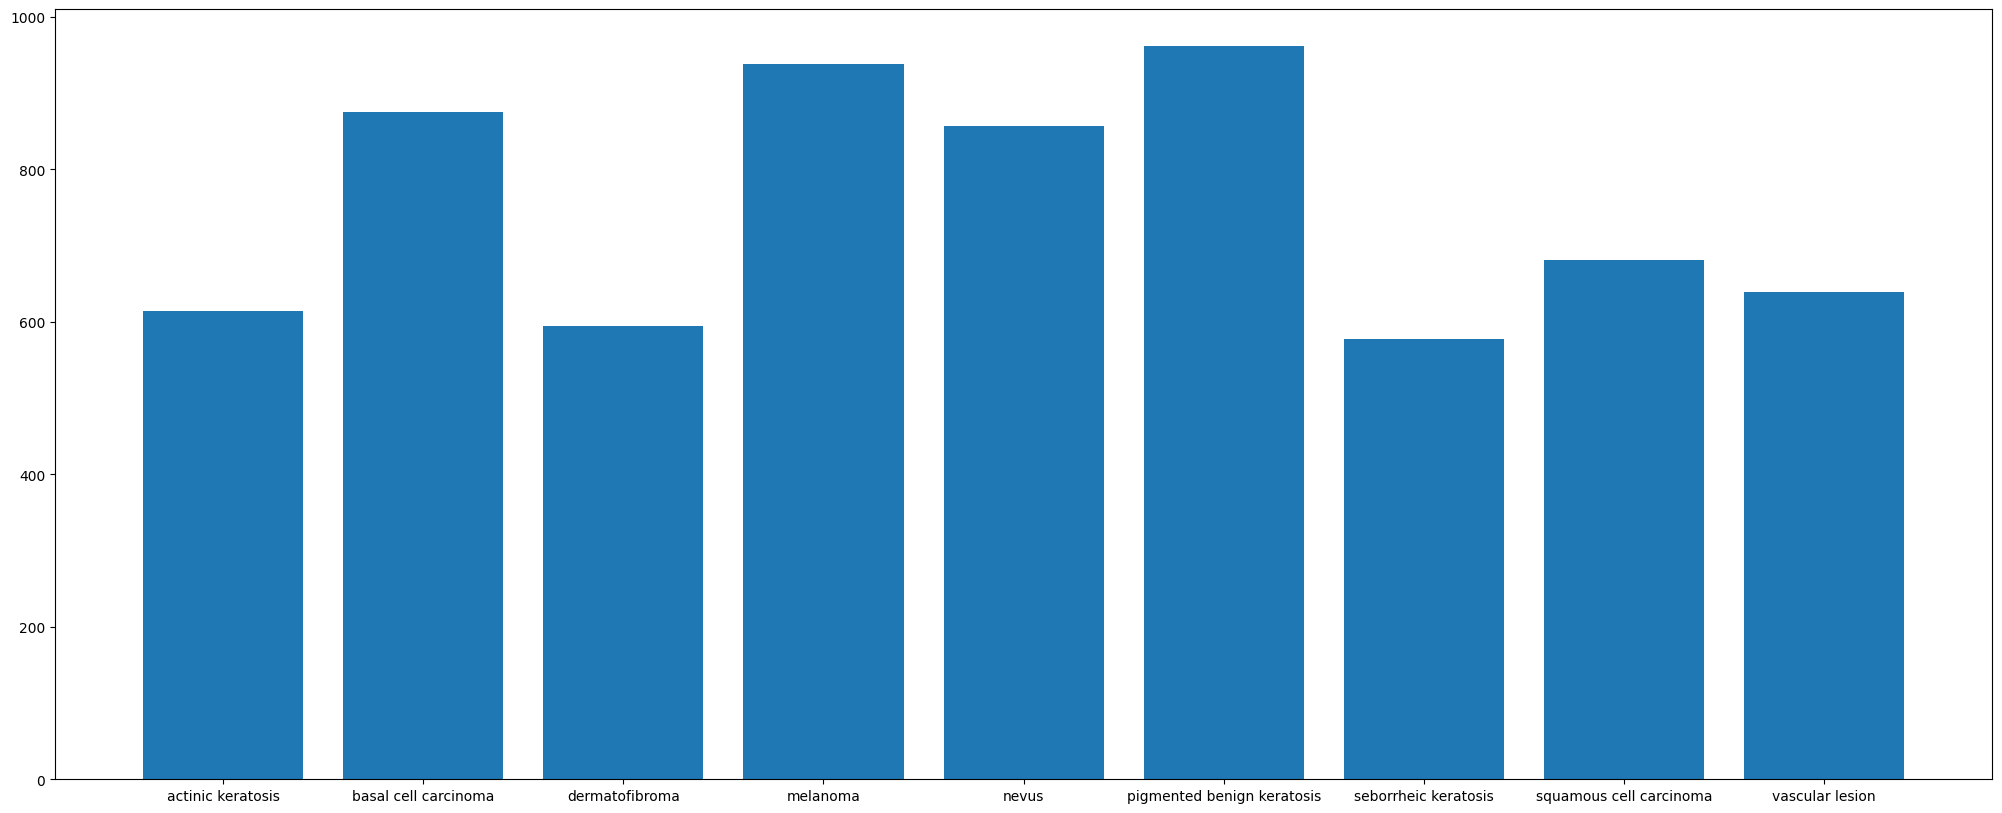

In [ ]:
#plot the images to check if all the cancer types are equally distributed
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))) + len(list(data_dir_train.glob(i+'/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## New model created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [80]:
data_dir_train="gdrive/My Drive/CNN_assignment/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


####  Create a validation dataset

In [81]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create final model (make sure to include normalization)

In [82]:
model=Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)))

model.add(layers.Conv2D(32,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names),activation='softmax'))

#### Compile the model

In [83]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')

#### Train the model

In [84]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 42s 230ms/step - loss: 2.2857 - accuracy: 0.1621 - val_loss: 1.8911 - val_accuracy: 0.2940
Epoch 2/30
169/169 [==============================] - 40s 232ms/step - loss: 1.7139 - accuracy: 0.3511 - val_loss: 1.4235 - val_accuracy: 0.4662
Epoch 3/30
169/169 [==============================] - 37s 212ms/step - loss: 1.4036 - accuracy: 0.4603 - val_loss: 1.2751 - val_accuracy: 0.4981
Epoch 4/30
169/169 [==============================] - 38s 219ms/step - loss: 1.2959 - accuracy: 0.5158 - val_loss: 1.3266 - val_accuracy: 0.4944
Epoch 5/30
169/169 [==============================] - 38s 219ms/step - loss: 1.1290 - accuracy: 0.5807 - val_loss: 1.2383 - val_accuracy: 0.5494
Epoch 6/30
169/169 [==============================] - 37s 211ms/step - loss: 1.0074 - accuracy: 0.6211 - val_loss: 1.0096 - val_accuracy: 0.6355
Epoch 7/30
169/169 [==============================] - 39s 226ms/step - loss: 0.9053 - accuracy: 0.6704 - val_loss: 0.9281 - val_ac

#### **Todo:**  Visualize the model results

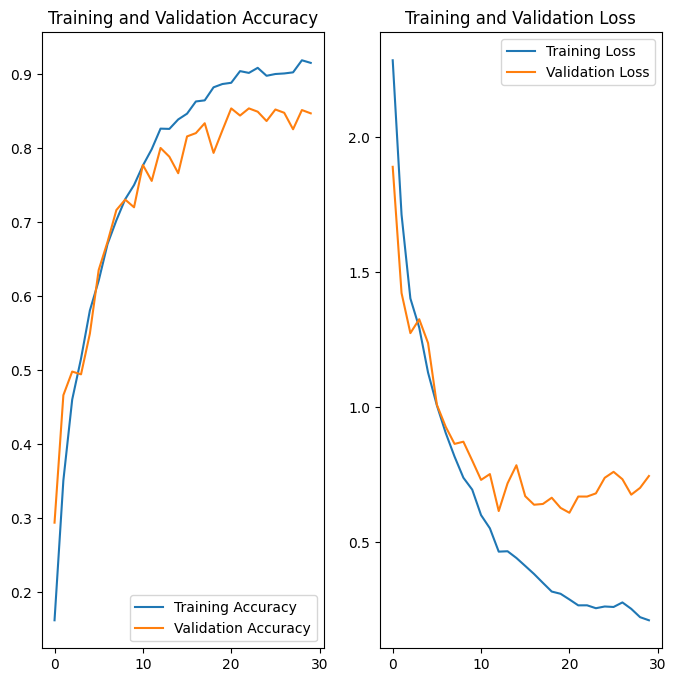

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:
 1. Did you get rid of underfitting/overfitting? - Yes
 2. Did class rebalance help? - Yes rebalancing helped to increase the accuracy of training and validation.
 3. Training accuracy is close to 91% and validation accuracy is close to 85%

